# 1. DATA WRANGLING

In [171]:
# Loading Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [172]:
# Load data for train and test
train = pd.read_csv(r'C:\Users\NAVIN P NATHAN\Desktop\Decodr Technologies\TrainLin.csv')
test = pd.read_csv(r'C:\Users\NAVIN P NATHAN\Desktop\Decodr Technologies\TestLin.csv')

In [173]:
# Print the head of Train Data
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [174]:
# Print the head of Test Data
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [175]:
# Get the shapes of Train and Test Data
train.shape

(700, 2)

In [176]:
# Get the shape of Test data
test.shape

(300, 2)

# 2. DATA CLEANING

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB


In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [179]:
# Finding missing values
train.isnull().sum() 

x    0
y    1
dtype: int64

In [180]:
test.isnull().sum()

x    0
y    0
dtype: int64

In [181]:
train.dropna(inplace=True)

In [182]:
# Describe the Dataset
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [183]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


# 3. VISUALIZATION OF TRAIN DATASET

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001820FDA8C88>,
      dtype=object)

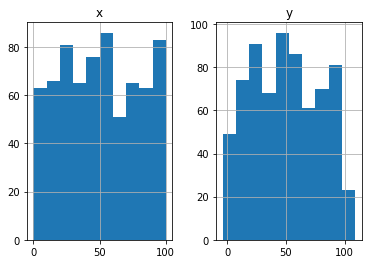

In [184]:
train.hist()

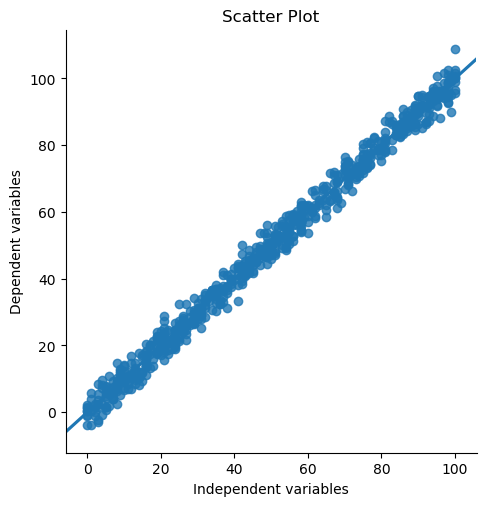

In [185]:
# Plotting Scatter Plot
import seaborn as sns
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='x', y='y', data=train)
plt.title("Scatter Plot");
plt.xlabel('Independent variables')
plt.ylabel('Dependent variables')
plt.show()

There is a positive linear relation between the points. That is, as X increases, Y also increases. 

# 3.3 BOXPLOTS

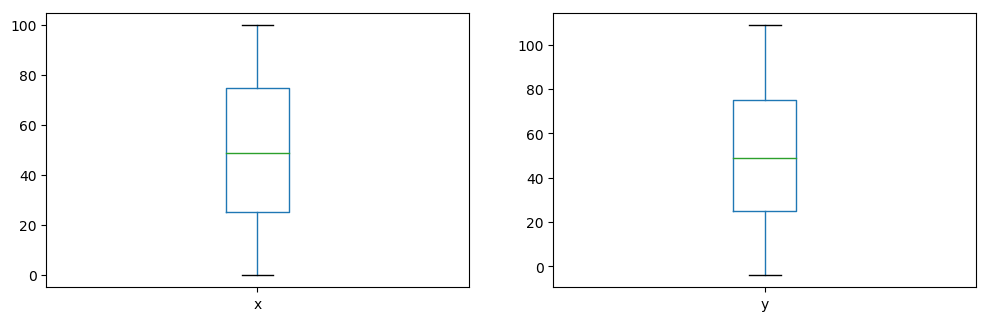

In [186]:
train.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.show()

In [187]:
y = train.y
x = train.x

# PARAMETER FUNCTIONS

# 4.1 MEAN AND VARIANCE

In [188]:
# Define Mean Values
def mean(values):
	return sum(values) / float(len(values))

In [189]:
# Define Variance values
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [190]:
# Estimate Mean and Variance
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# calculate mean and variance
dataset = train
y = train.y
x = train.x
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=50.014 variance=585179.857
y stats: mean=49.940 variance=591447.871


# 4.2 CALCULATE COVARIANCE

In [191]:
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))
	return covar

In [192]:
from numpy import array
from numpy import cov
x = train.x
y = train.y
Sigma = cov(x,y)[0,1]
print(Sigma)

838.9168458155477


# 4.3 COEFFICIENTS

In [193]:
from numpy import corrcoef
x = train.x
y = train.y
Sigma = corrcoef(x,y)
print(Sigma)

[[1.         0.99533991]
 [0.99533991 1.        ]]


In [194]:
import statsmodels.api as sm

x = sm.add_constant(x)  # adding const to dependent variable
result = sm.OLS(y,x).fit()  #Fitting our model
result.summary()

D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:19:45   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.212     -0.506      0.613      -0.524       0.309
x              1.0007      0.004    272.510      0.000       0.993       1.008
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.216
Skew:                           0.036   Prob(JB):                        0.898
Kurtosis:                       2.952   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# We have the equation y = mx+c
# Definng the Linear Regression
c = -0.1073 # intercept
m = 1.007 # coefficient

yhat = m*x + c

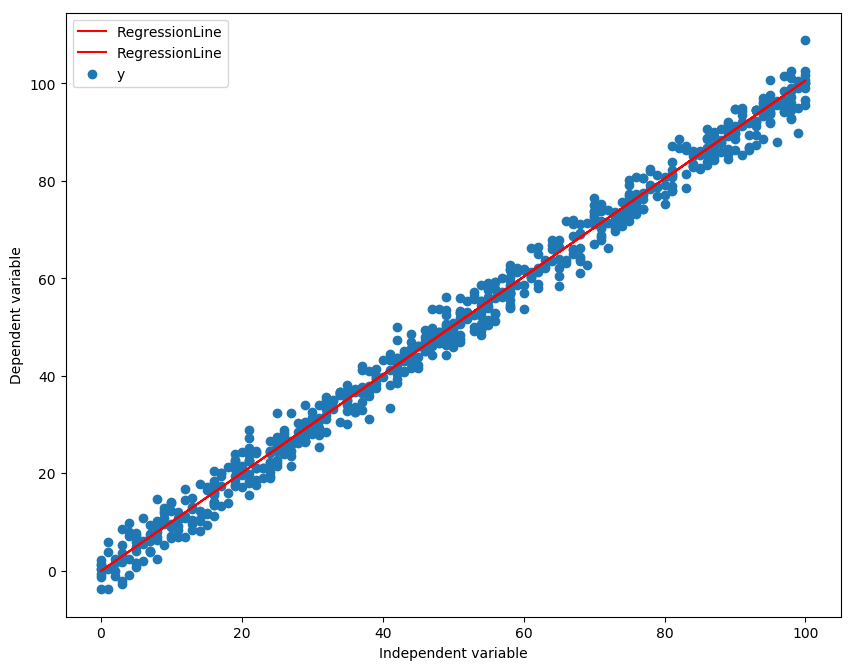

In [197]:
# Plotting the regression line
plt.scatter(train.x,train.y)
plt.plot(x,yhat,label='RegressionLine',c='Red') # Regression Line
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.legend()
plt.show()

In [53]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [198]:
x_training_set = train_set.as_matrix(['x'])
y_training_set = train_set.as_matrix(['y'])
x_test_set = test_set.as_matrix(['x'])
y_test_set = test_set.as_matrix(['y'])

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


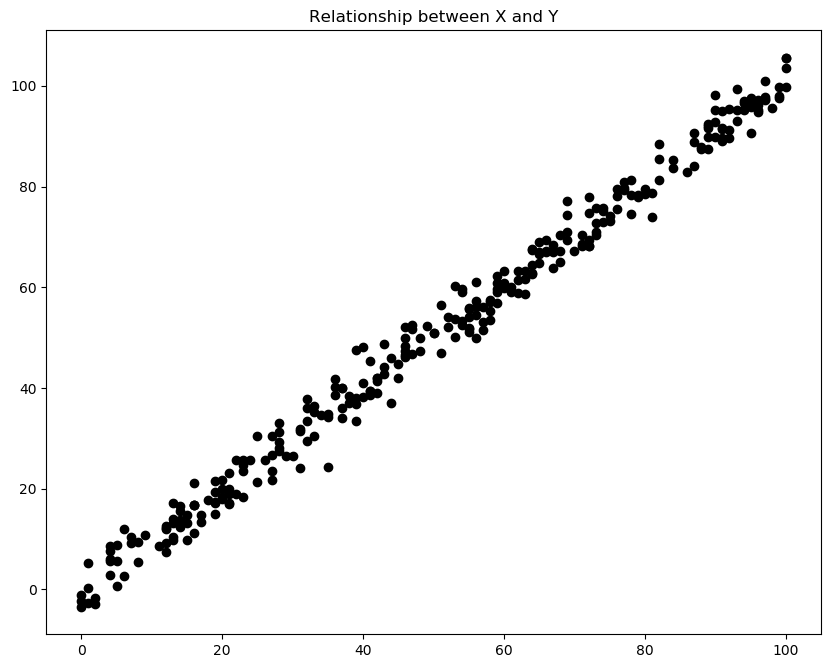

In [199]:
plt.title('Relationship between X and Y')
plt.scatter(x_test_set, y_test_set,  color='black')
plt.show()

In [63]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [140]:
print(linreg.intercept_)

0.0764999154956385


In [141]:
print(linreg.coef_)

[0.         0.99895042]


**TASK : Split into `dependent` and `independent` variable and name them `y` and `X` respectively**

In [165]:
#Independent  Variable 
X = train.x.values
#Dependent Variable
y = train.y.values

**TASK : Make `functions` for mean and variance**

4.1 Mean and Variance
Mean of numbers can be calculated as: -

mean(x) = sum(x) / count(x)

In [152]:
#Calculate mean of list numbers with mean function
def mean(numbers):
    return sum(numbers) / float(len(numbers))

#Calculate varience of list numbers with variance function
def variance(numbers, mean):
    return sum([abs(x-mean)**2 for x in numbers])

**TASK : Find the mean and variance of X and y and store it in `X_mean` , `y_mean` , `X_variance` , `y_variance`**

In [167]:
X_mean, y_mean = mean(X), mean(y)
X_variance = variance(X, X_mean)
y_variance = variance(y, y_mean)

### `4.2` Calculate Covariance
covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.
 
you can calculate the covariance between two variables as follows: 
       
       covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))


**TASK : Create function to implement `co-variance`**

In [155]:
def covariance(X, X_mean, y, y_mean):
    ln = len(X)
    cov = 0.0
    for i in range(ln):
        cov += ((X[i] - X_mean) * (y[i] - y_mean))
    return cov

### `4.3` Coefficients
Estimate two coefficients in simple linear regression. which is m and b.

    m = covariance() / variance()
    b = mean(y) - (m*mean(X))

**TASK : Make a function `coefficients()` which returns m,b**

In [156]:
def coefficients():
    m = covariance(X, X_mean, y, y_mean) / variance(X, X_mean)
    b = y_mean - (m*X_mean)
    return [m,b]

### `4.4` Splitting Test Data 

In [168]:
X_test = test['x'].values.reshape(-1, 1)
y_test = test['y'].values.reshape(-1, 1)

## `5.` Linear Regression Model and Predictions

**TASK : Make a function to evaluate `linear_regression` with above calculated parameters**

In [158]:
def simple_linear_regression():
    prediction = list()
    m, c = coefficients()
    for test in X_test:
        y_pred = m*test[0] + c
        prediction.append(y_pred)
    return prediction

**TASK : Make a plot of the predictions**

In [159]:
predict = simple_linear_regression()

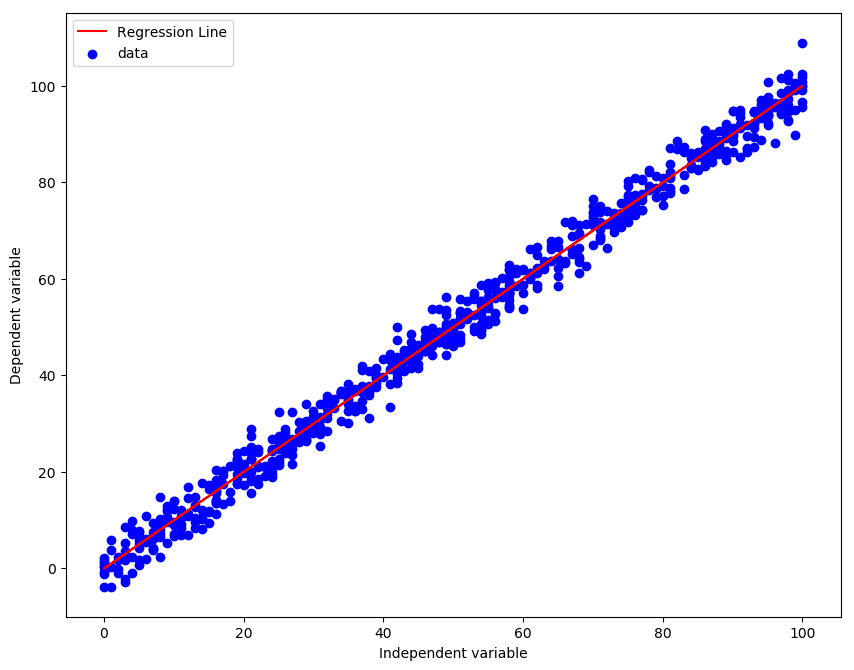

In [160]:
plt.plot(X_test, predict, c='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, label='data', c='blue')

plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

## `6.` RMSE Function Building and Calculation
We need to find how good is our model. There are many methods to evaluate models. Here we will use **Root Mean Sqare Error** 

**Root Mean Sqare Error** is the square root of the sum of all errors divided by the number of values.
![RMSE](https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif)
Here yhat is the ith predicted output values , yhat= mX + c


**TASK : Make `Root_mean_square_error` function**

In [161]:
### START CODE HERE (Write code where '#' is given) 
def root_mean_sqaure_error():
    rmse = 0.0
    m, c = coefficients()
    for i in range(len(X_test)):
        yhat = m*X_test[i] + c
        rmse += (y_test[i] - yhat)**2
    rmse = np.sqrt(rmse/len(X_test))
    rmse = rmse[0]
    return rmse

**TASK : Calculate RMSE using made function**

In [170]:
### START CODE HERE 
#Root Mean Sqare Error
RMSE = root_mean_sqaure_error()
RMSE

3.0713062680298298